# Проект "Стримчик":


Поработаем с данными о продажах игр до 2016. Подготовим данные, посторим несколько графиков, проведем исследовательский анализ данных, найдем интересные закономерности, а так же проверим некоторые теории. 

## Общая информация

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

импортируем библиотеки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

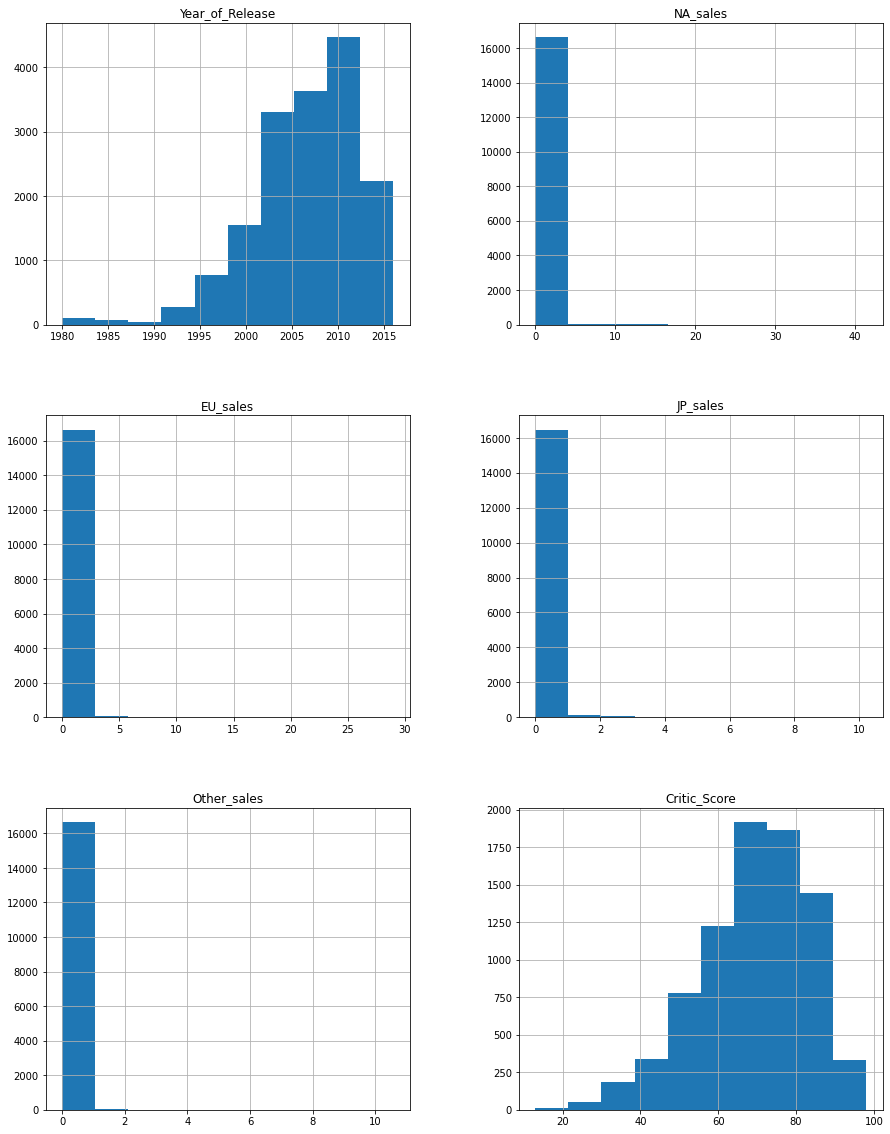

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.hist(figsize=(15, 20))

сохраняем датасет в переменной, строим гистограммы и знакомимся с данными

<div class="alert-info">
<b>Из всех выведенных гистограмм можно оценцить гистограмму столца year_of_release- видно, что игр до 1995 года выпускалось довольно мало.
   На гистограмме столбца Critic_score отмечается нормальное распределение со скосом вправо.
   Гистограммы остальных столбцов не построились из-за строкового типа данных.
    </b>


## Подготовка данных

In [3]:
data.columns = data.columns.str.lower()
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


приведем названия всех столбцов к нижнему регистру

In [4]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')


Поменяем тип данных в столбце user_score.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [6]:
display(data.isna().sum())
display(data[data['genre'].isna()])
data.dropna(subset=['genre'], inplace=True)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
display(data.isna().sum())
data.info()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [8]:
data['rating'] = data['rating'].fillna('no rating')
display(data['rating'])

0                E
1        no rating
2                E
3                E
4        no rating
           ...    
16710    no rating
16711    no rating
16712    no rating
16713    no rating
16714    no rating
Name: rating, Length: 16713, dtype: object

 С помощью isna() определяем что есть 2 строки с пропусками сразу в нескольких столбцах. С уверенностью можно сказать, что эти строки можно удалить без потери качества данных.
 После проверки остали пропуски в столбцах year_of_release, critic_score, user_score, rating. Здесь не вижу смысла работать с пропусками, так как замена медианой даст лишь скос среднего в сторону медианы, а качество данных не улучшит.

In [9]:
user_score_unique = data['user_score'].unique()
display(user_score_unique)


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

После обработки пропусков значение TBD в столбце user_score пропало. Как я понял, это что-то вроде ошибки отображения форматов NaN во float64.

In [10]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


Создаем новый столбец с суммарными продажами во всех регионах путем сложения соответствующих столбцов

<div class="alert-info">
<b>Пропуски мы почти не трогали, удалили всего 2 строки. Изменили тип данных в столбце user_score. После проверки остались пропуски в столбцах year_of_release, critic_score, user_score, rating. Здесь не вижу смысла работать с пропусками, так как замена медианой даст лишь скос среднего в сторону медианы, а качество данных не улучшит. 
Также создали новый столбец с суммарными продажами</b>
</div>

,name
year_of_release,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


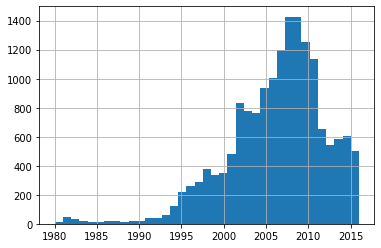

In [11]:
data['year_of_release'].hist(bins=37)
data['year_of_release'].describe()
#data.pivot_table(index='year_of_release',values='name', aggfunc='count')
data.pivot_table(index='year_of_release',values='name', aggfunc='count').sort_values(by='name', ascending=False)
#sns.barplot(data=data, x='year_of_release', y='name')

На гистограмме и сводной таблице отмечается пик количества выпускаемых игр на 2008году. 2006-2011 года наиболее продуктивные.
До 1995 года выпускалось малое колиство игр (до 200 в год).

## Исследовательский анализ данных

     year_of_release platform  count
0             1996.0       GB      6
1             1996.0      N64     18
2             1996.0       NG      2
3             1996.0       PC      4
4             1996.0     PCFX      1
..               ...      ...    ...
173           2016.0      PS4    164
174           2016.0      PSV     85
175           2016.0      Wii      1
176           2016.0     WiiU     14
178           2016.0     XOne     87

[179 rows x 3 columns]


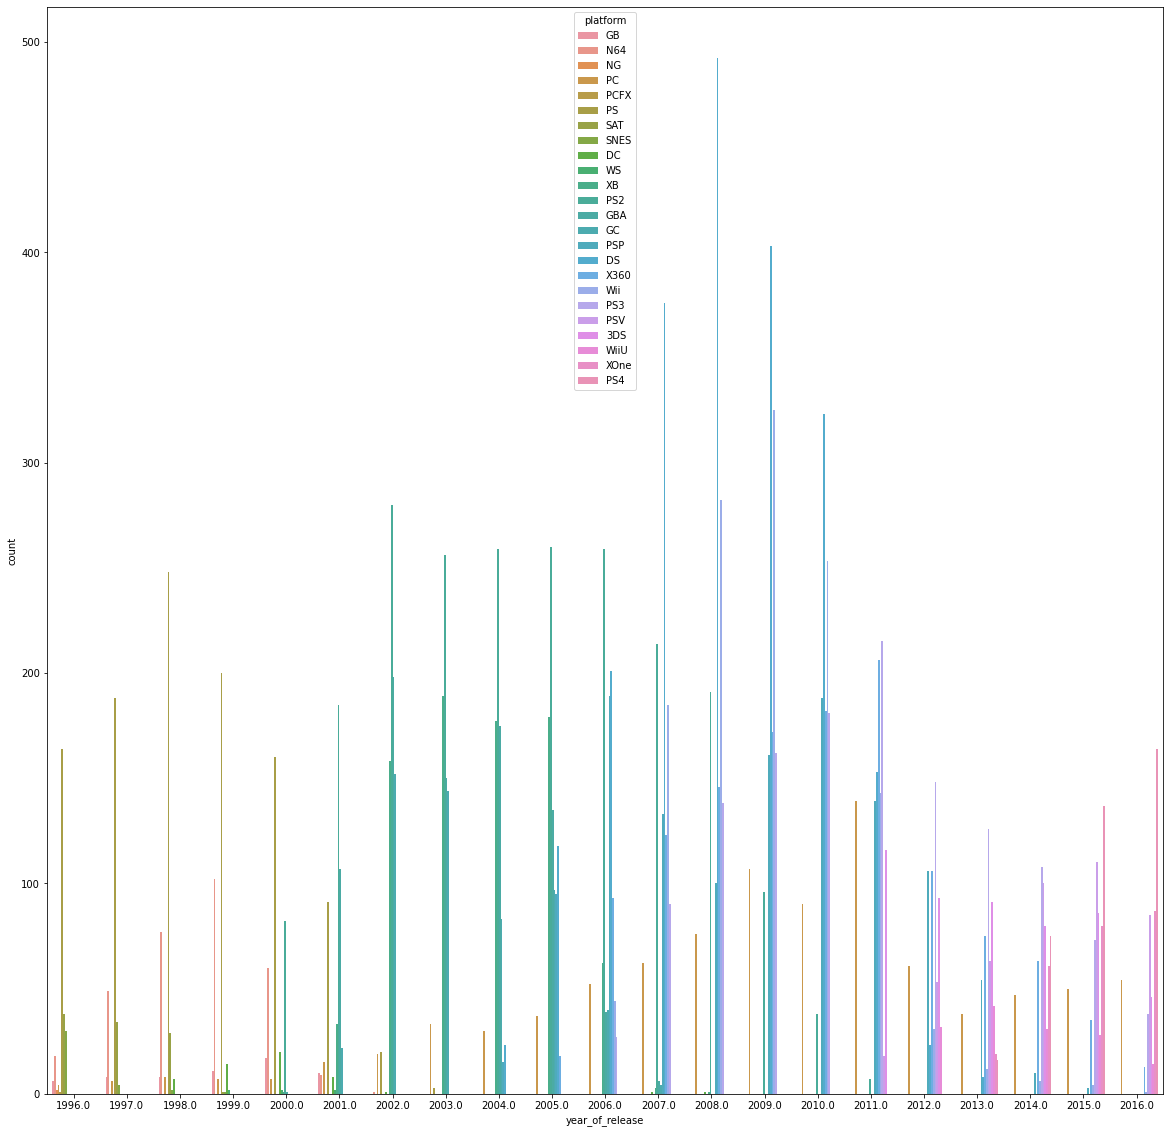

In [12]:
#platform_stat_per_year = data.pivot_table(index='year_of_release', values='platform', aggfunc='count')

platform_stat_per_year = data.query('year_of_release>1995').pivot_table(
            index=['year_of_release', 'platform'],\
            values='name',\
            aggfunc=['count']\
).round(2).reset_index()

platform_stat_per_year.columns = ['year_of_release', 'platform', 'count']
platform_stat_per_year = platform_stat_per_year.sort_values(by='year_of_release')
print(platform_stat_per_year)

plt.figure(figsize=(20,20))
ax = sns.barplot(x='year_of_release',
            y='count',
            hue="platform",     
            data=platform_stat_per_year)

plt.show()

,year_of_release,platform,sum
0,1996.0,GB,36.03
1,1996.0,N64,34.10
2,1996.0,NG,0.10
3,1996.0,PC,10.58
4,1996.0,PCFX,0.03
...,...,...,...
174,2016.0,PSV,4.25
175,2016.0,Wii,0.18
176,2016.0,WiiU,4.60
177,2016.0,X360,1.52


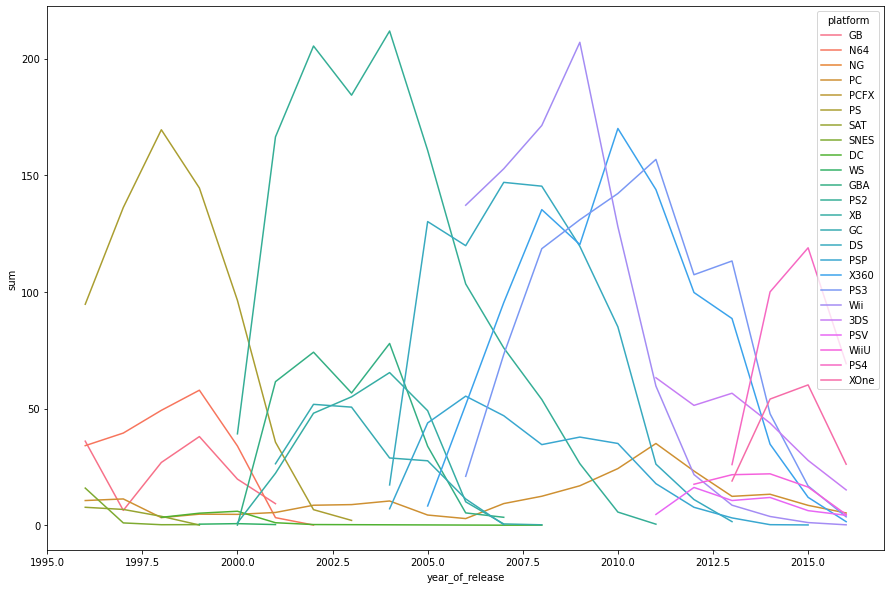

In [13]:
platform_sales_per_year = data.query('year_of_release>1995').pivot_table(
            index=['year_of_release', 'platform'],\
            values='total_sales',\
            aggfunc='sum'\
).round(2).reset_index()

platform_sales_per_year.columns = ['year_of_release', 'platform', 'sum']
display(platform_sales_per_year)

plt.figure(figsize=(15,10))
ax = sns.lineplot(x='year_of_release',
            y='sum',
            hue="platform",     
            data=platform_sales_per_year)

plt.show()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


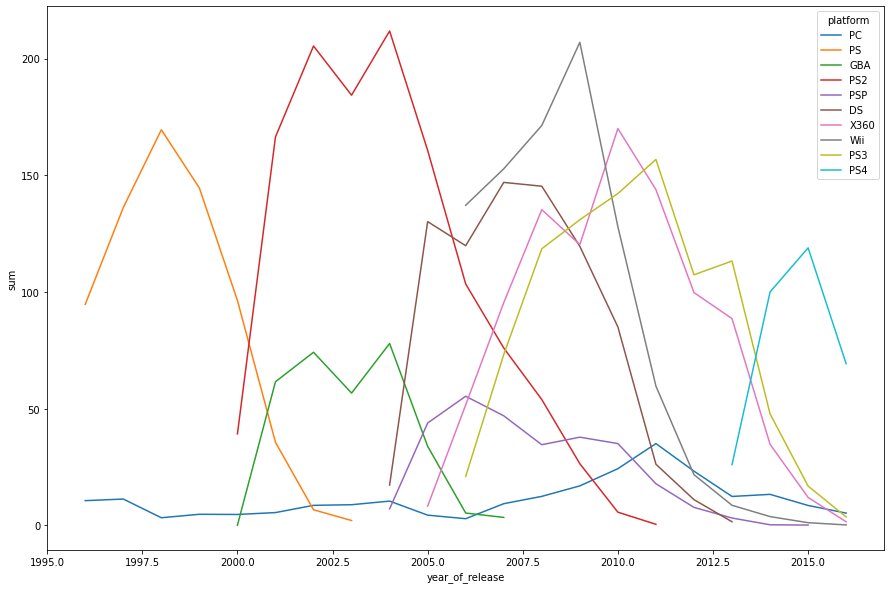

In [14]:
top_platforms = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
top_platforms = top_platforms.head(10)
display(top_platforms)
top_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP','PC']

top_platforms_state = data.query('platform in @top_platforms_list')

top_platforms_state = top_platforms_state.query('year_of_release>1995').pivot_table(
            index=['year_of_release', 'platform'],\
            values='total_sales',\
            aggfunc=['sum']\
).round(2).reset_index()

top_platforms_state.columns = ['year_of_release', 'platform', 'sum']
top_platforms_state = top_platforms_state.sort_values(by='year_of_release')
#print(platform_sales_per_year.sort_values(by='sum', ascending=False))


plt.figure(figsize=(15,10))
ax = sns.lineplot(x='year_of_release',
            y='sum',
            hue="platform",     
            data=top_platforms_state)

plt.show()

Сделали выборку из 10 самых продаваемых платформ. 
-Большинство платформ появляются и исчезают в период от 5 до 10 лет кроме DS и PC.
-Актуальным периодом можно назвать период с 1995г- появилась PS и дальнейшие 10 лет стратовали другие крупные комании.
-PC - игры приносили гораздо меньше, но зато диапозон покрывает весь анализируемый период, нельзя сказать, что он менее прибыльный, ведь неизвестны затраты на производство, т.е. конверсия, так же можно учитывать, что PC гораздо более популярная техника, чем игровые приставки и портативные системы и продать игровой диск на PC легче, чем приставку с диском и т.д..
-DS, GBA, PSP - портативные игровые системы, по прибыли находятся между PC и игровыми приставками.
-Наиболее прибыльные игровые приставки. Можно отметить успешную компанию PS: 4 серии приставок с пиком PS2 и снижение к выходу PS4. Не сильно отстали платформы Wii, XBOX и  DS.

<div class="alert-info">
<b>Исправлено. Выбран период с 2014г. Также вместе суммарных продаж используется медианный показатель и выбрано 5 топ платформ:</b>
</div>

,total_sales
platform,
XOne,0.205
WiiU,0.190
PS4,0.185
Wii,0.180
X360,0.180


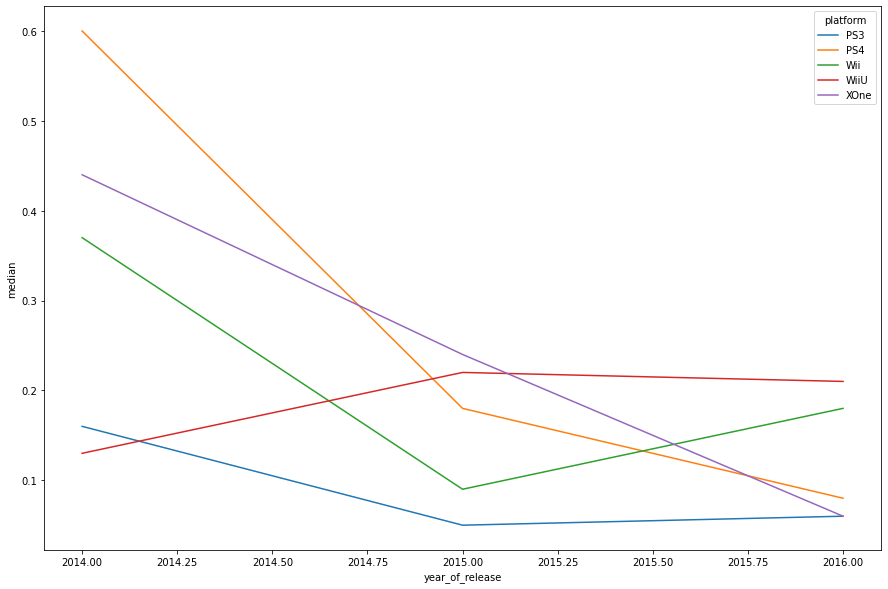

In [15]:
top_platforms = (
    data
    .query('year_of_release>2013')
    .pivot_table(index='platform', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
)
top_platforms = top_platforms.head(5)
display(top_platforms)
top_platforms_list = ['XOne', 'PS3', 'Wii', 'PS4', 'WiiU']

top_platforms_state = data.query('platform in @top_platforms_list')

top_platforms_state = top_platforms_state.query('year_of_release>2013').pivot_table(
            index=['year_of_release', 'platform'],\
            values='total_sales',\
            aggfunc=['median']\
).round(2).reset_index()

top_platforms_state.columns = ['year_of_release', 'platform', 'median']
top_platforms_state = top_platforms_state.sort_values(by='year_of_release')
#print(platform_sales_per_year.sort_values(by='sum', ascending=False))


plt.figure(figsize=(15,10))
ax = sns.lineplot(x='year_of_release',
            y='median',
            hue="platform",     
            data=top_platforms_state)

plt.show()

-С 2014 по 2016года включительно топ 5 платформами являются: Wii, WiiU, PS3, XOne, PS4.
-В 2014г лидером по продажам была платформа PS4, в 2016 - WiiU.
-Однозначно в этом топе игровые приставки.


-медиана количества продаж Wii к 2014г сгладилось с абсциссой.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

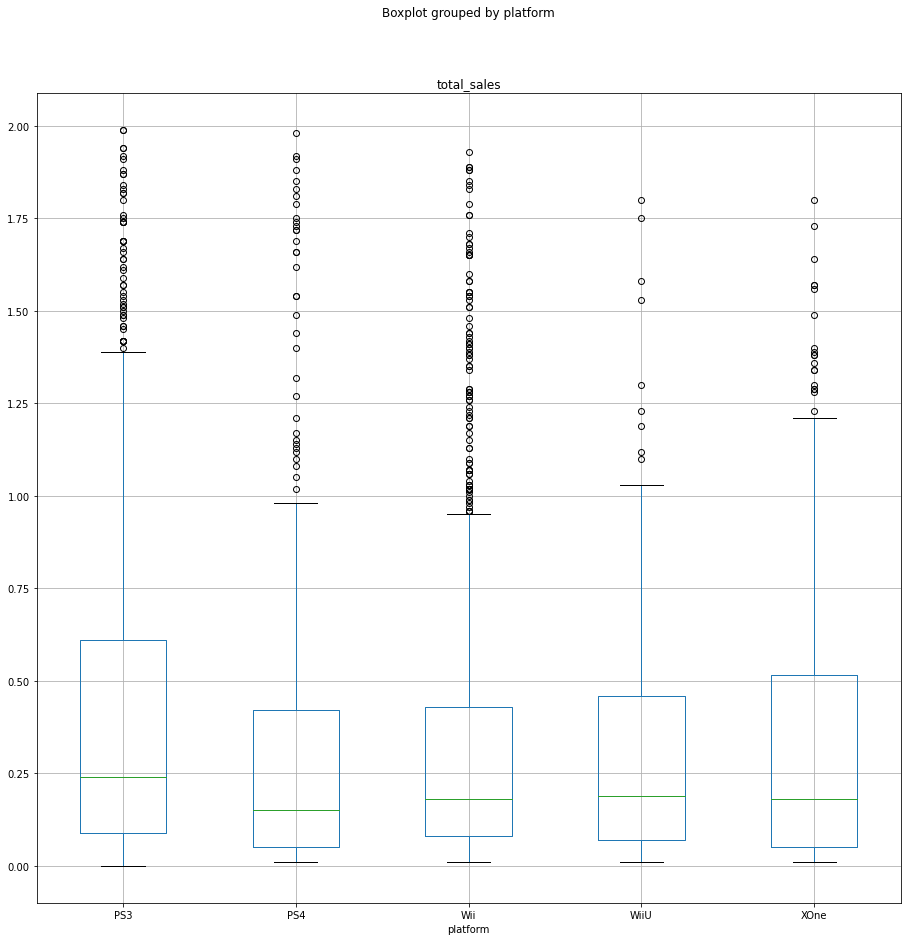

In [16]:


data[(data['total_sales'] < 2)].query('platform in @top_platforms_list').boxplot(by='platform', column='total_sales', figsize=(15,15))



<div class="alert-info">
<b>Для наглядности уберем значения продаж более 10млн.

Выбросы или успешные проекты есть у всех выбранных платформ. Но медианное значение всех продаж по платформам не превышает 1 млн.</b>
</div>


<div class="alert-info">
<b>Исправлено, установил ограничение до 2 млн.</b>
</div>

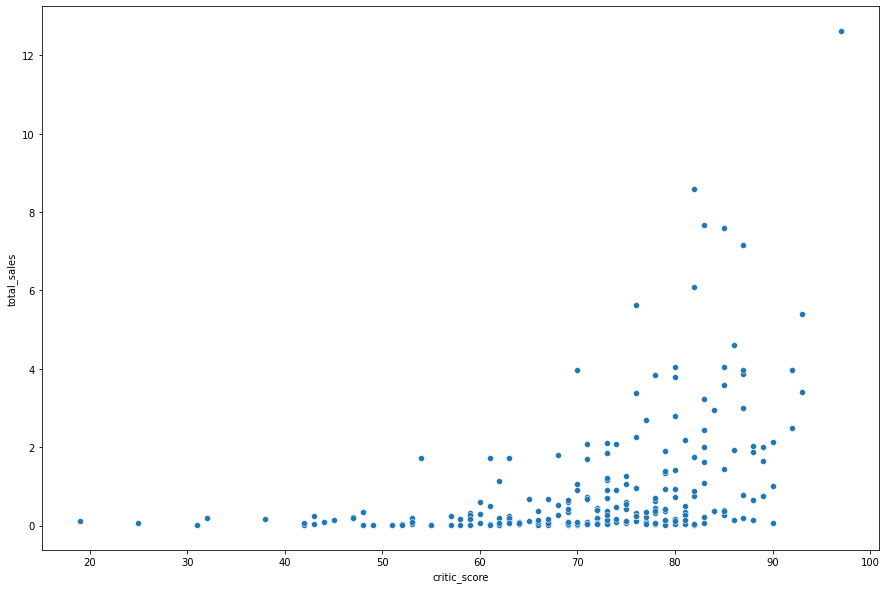

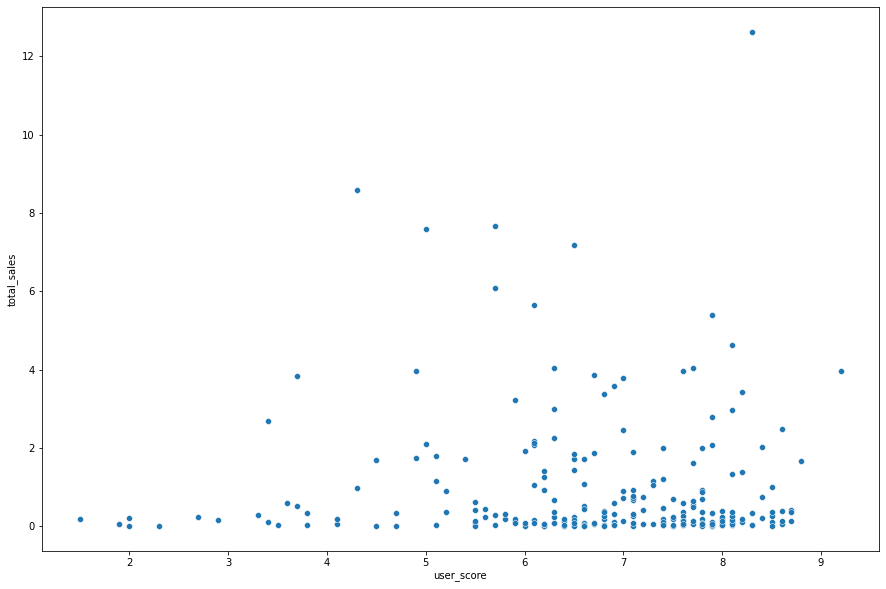

,critic_score,user_score,total_sales
critic_score,1.000000,0.563115,0.411975
user_score,0.563115,1.000000,-0.030926
total_sales,0.411975,-0.030926,1.000000


In [18]:
ps4_stat = data[data['platform']=='PS4']

ps4_stat_score = ps4_stat.pivot_table(
            index=['critic_score', 'user_score'],\
            values='total_sales',\
            aggfunc='median'\
).round(2).reset_index()

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="critic_score",
            y='total_sales',  
            data=ps4_stat_score)
plt.figure(figsize=(15,10))
x = sns.scatterplot(x="user_score",
            y='total_sales',  
            data=ps4_stat_score)
plt.show()

ps4_stat_score.corr()

На диаграммах рассеяния видно, что с ростом оценки критиков и пользователей растет и количество проданных копий. Коэффициенты корреляции 0.36 и 0.40 соответственно. Построим те же графики для других платформ.

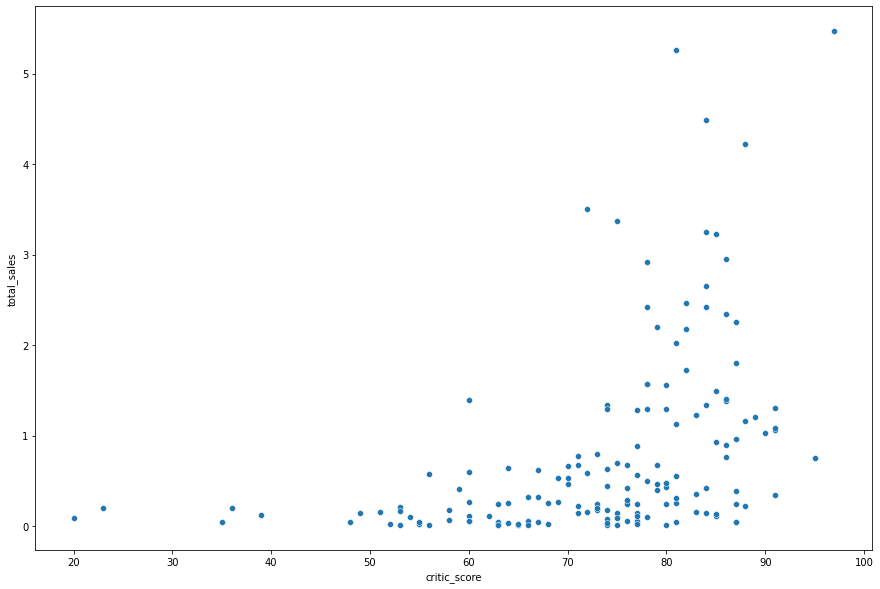

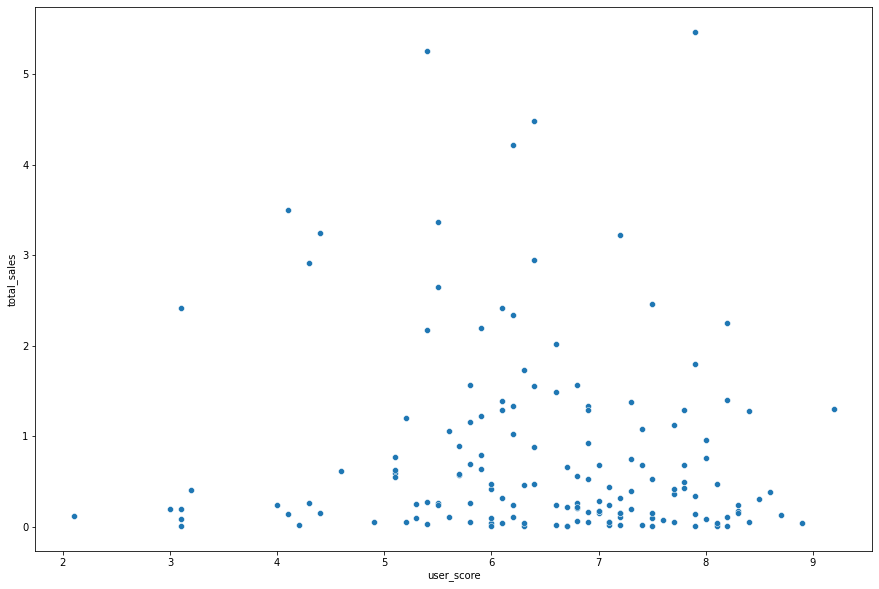

,critic_score,user_score,total_sales
critic_score,1.000000,0.463323,0.418354
user_score,0.463323,1.000000,-0.099320
total_sales,0.418354,-0.099320,1.000000


In [19]:
xone_stat = data[data['platform']=='XOne']

xone_stat_score = xone_stat.pivot_table(
            index=['critic_score', 'user_score'],\
            values='total_sales',\
            aggfunc='median'\
).round(2).reset_index()

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="critic_score",
            y='total_sales',  
            data=xone_stat_score)
plt.figure(figsize=(15,10))
x = sns.scatterplot(x="user_score",
            y='total_sales',  
            data=xone_stat_score)
plt.show()

xone_stat_score.corr()

На диаграммах рассеяния видно, что с ростом оценки критиков и пользователей растет и количество проданных копий. Коэффициенты корреляции 0.45 и 0.15 соответственно. 

<div class="alert-info">
<b>Для платформы PS4: с ростом оценки критиков и пользователей растет и количество проданных копий.
Коэффициенты корреляции 0.36 и 0.40 соответственно. Влияние оценок пользователей незначительно выше. 
Для платформы XOne:с ростом оценки критиков и пользователей растет и количество проданных копий. 
Коэффициенты корреляции 0.45 и 0.15 соответственно. Влияние оценок критиков значительно выше.</b>
</div>

In [20]:
genres_quant = (
    data
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
)

genres_sales = (
    data[data['year_of_release']>2013]
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
)

display(genres_quant, genres_sales)


,name
genre,
Action,3369
Sports,2348
Misc,1750
Role-Playing,1498
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,873


,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


<div class="alert-info">
<b> 
 Самые популярные жанры с 2013г: Shooter, Sports, Misc.
 Самые не популярные жанрыс 2013: Strategy, Adventure, Puzzle.</b>
</div>

## Портрет пользователя каждого региона

### NA

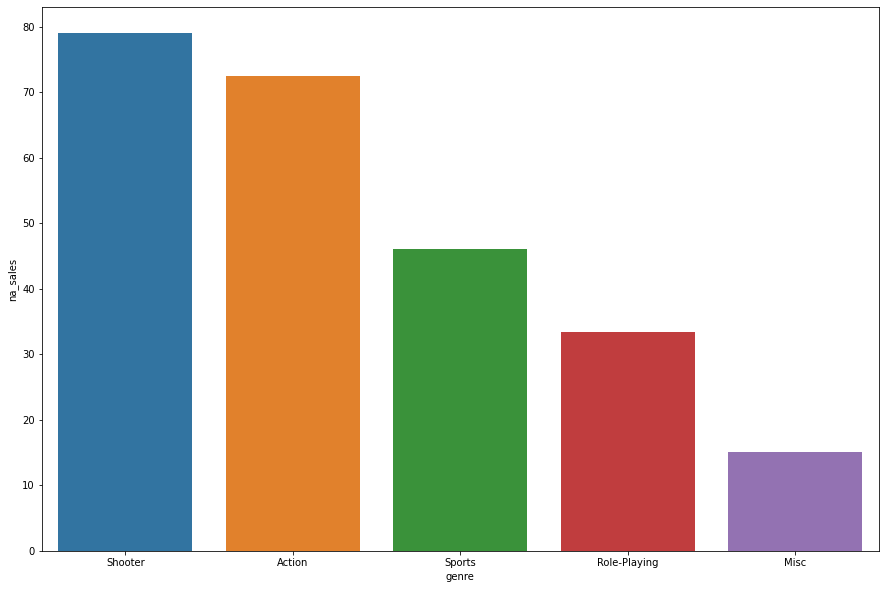

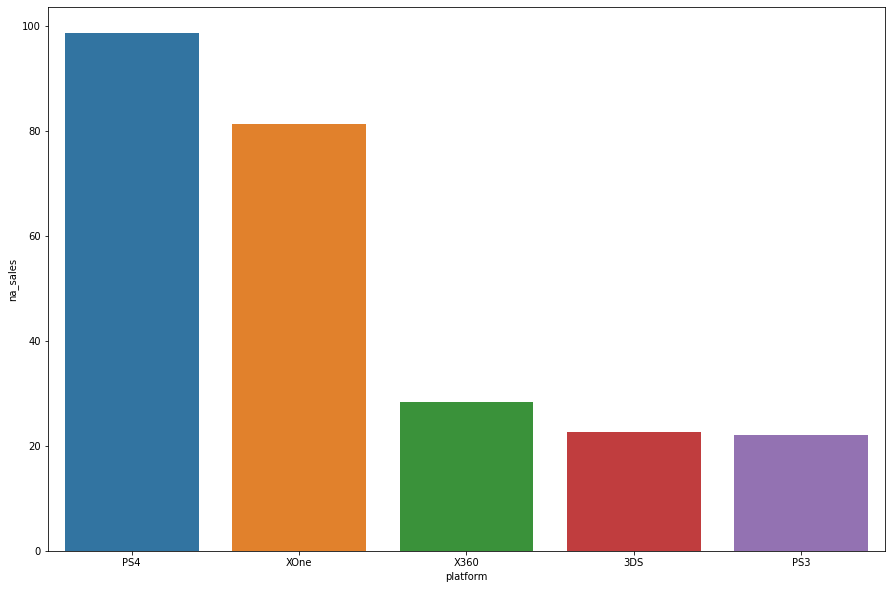

In [21]:
na_stat_genre = data[data['year_of_release']>2013].pivot_table(
            index='genre',\
            values='na_sales',\
            aggfunc='sum'\
).round(2).reset_index()
na_stat_genre = na_stat_genre.sort_values(by='na_sales', ascending=False).head(5)

na_stat_platform = data[data['year_of_release']>2013].pivot_table(
            index='platform',\
            values='na_sales',\
            aggfunc='sum'\
).round(2).reset_index()
na_stat_platform = na_stat_platform.sort_values(by='na_sales', ascending=False).head(5)

plt.figure(figsize=(15,10))
sns.barplot(data=na_stat_genre, x="genre", y="na_sales")
plt.show()

plt.figure(figsize=(15,10))
sns.barplot(data=na_stat_platform, x="platform", y="na_sales")
plt.show()

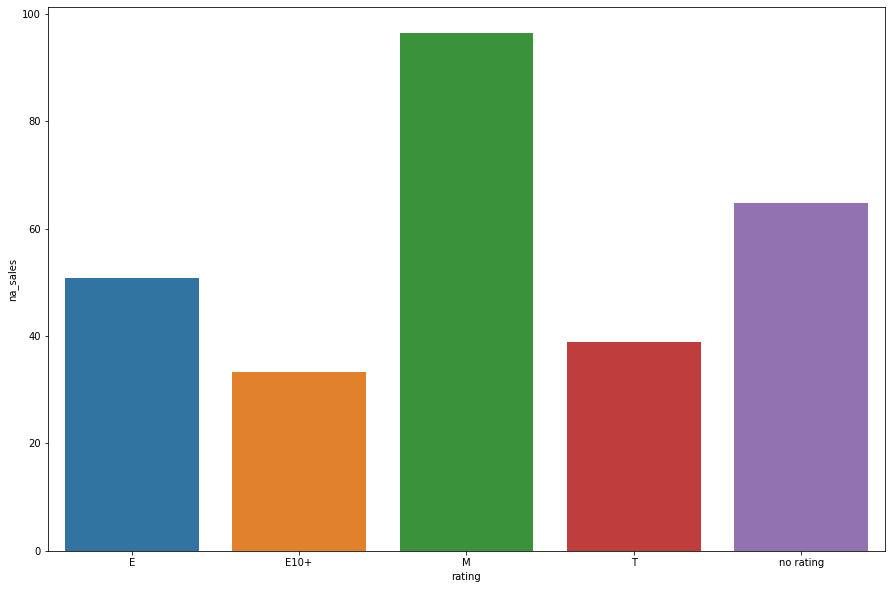

In [22]:
na_stat_rate = data[data['year_of_release']>2013].pivot_table(
            index='rating',\
            values='na_sales',\
            aggfunc='sum'\
).round(2).reset_index()

plt.figure(figsize=(15,10))
sns.barplot(data=na_stat_rate, x="rating", y="na_sales")
plt.show()


-Топ 5 популярных жанров в регионе NA: Shooter,Action, Sports, Role-Playing, Misc.
-platform, соответственно, не учитываем.
-Топ 5 популярных платформ в регионе NA: PS4, xOne, x360, PS3, WiiU. 	
-Самый большой спрос в регионе NA на игры с рейтингом ESRB- M. 

### EU

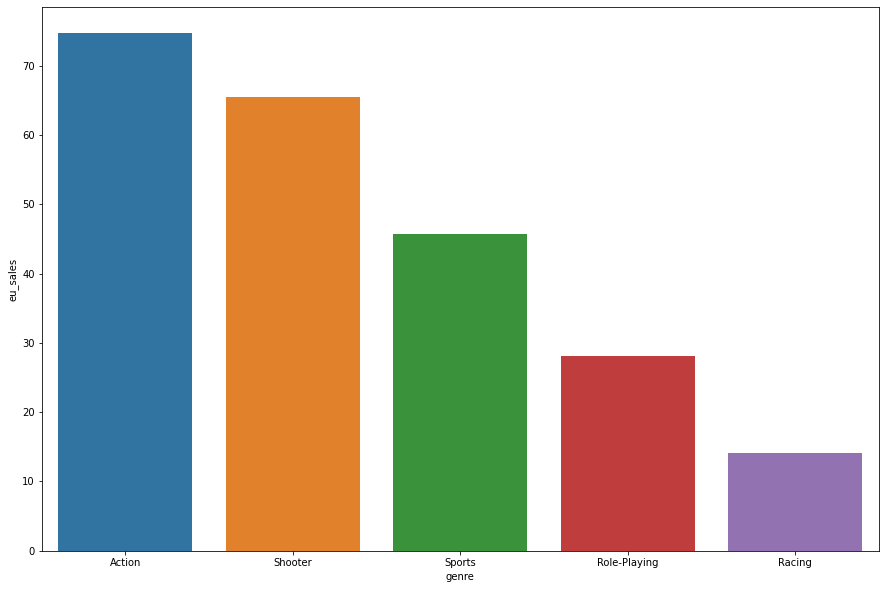

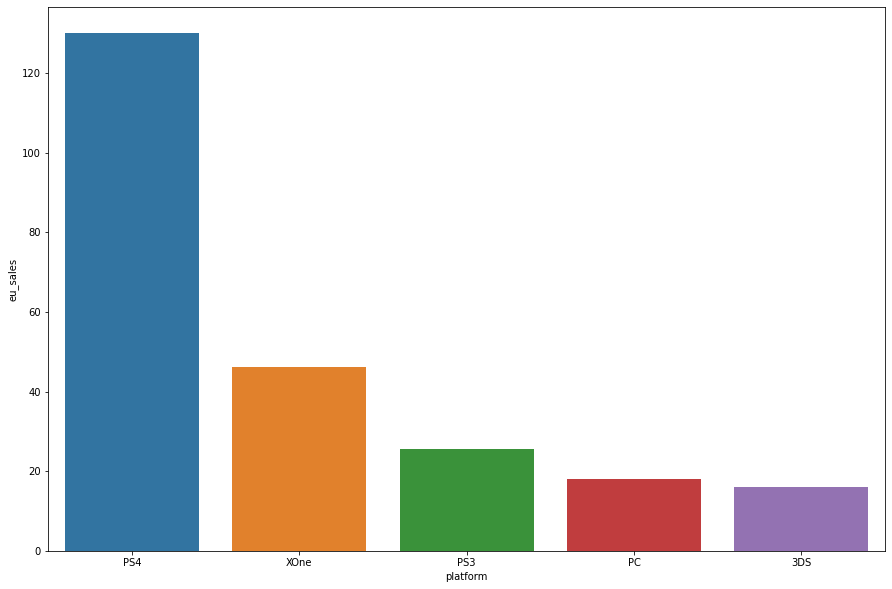

In [23]:
eu_stat_genre = data[data['year_of_release']>2013].pivot_table(
            index='genre',\
            values='eu_sales',\
            aggfunc='sum'\
).round(2).reset_index()

eu_stat_genre = eu_stat_genre.sort_values(by='eu_sales', ascending=False).head(5)

eu_stat_platform = data[data['year_of_release']>2013].pivot_table(
            index='platform',\
            values='eu_sales',\
            aggfunc='sum'\
).round(2).reset_index()

eu_stat_platform = eu_stat_platform.sort_values(by='eu_sales', ascending=False).head(5)

plt.figure(figsize=(15,10))
sns.barplot(data=eu_stat_genre, x="genre", y="eu_sales")
plt.show()

plt.figure(figsize=(15,10))
sns.barplot(data=eu_stat_platform, x="platform", y="eu_sales")
plt.show()

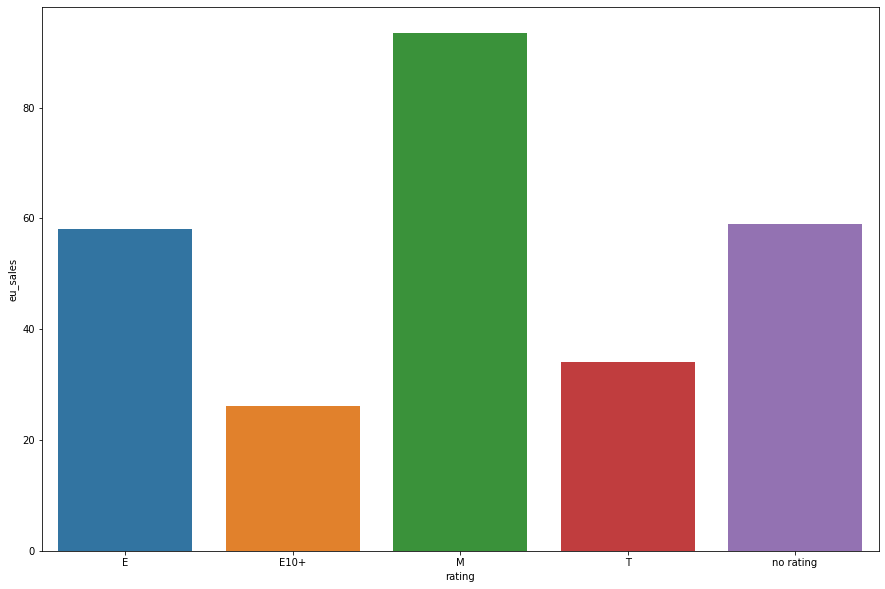

In [24]:
eu_stat_rate = data[data['year_of_release']>2013].pivot_table(
            index='rating',\
            values='eu_sales',\
            aggfunc='sum'\
).round(2).reset_index()

plt.figure(figsize=(15,10))
sns.barplot(data=eu_stat_rate, x="rating", y="eu_sales")
plt.show()

-Топ 5 популярных жанров в регионе EU: Action, Shooter, Sports, Role-playing, Racing .


-Топ 5 популярных платформ в регионе EU: PS4, xOne, PS3, PC, 3DS.	



-Самый большой спрос в регионе EU на игры с рейтингом ESRB- M. 

### JP

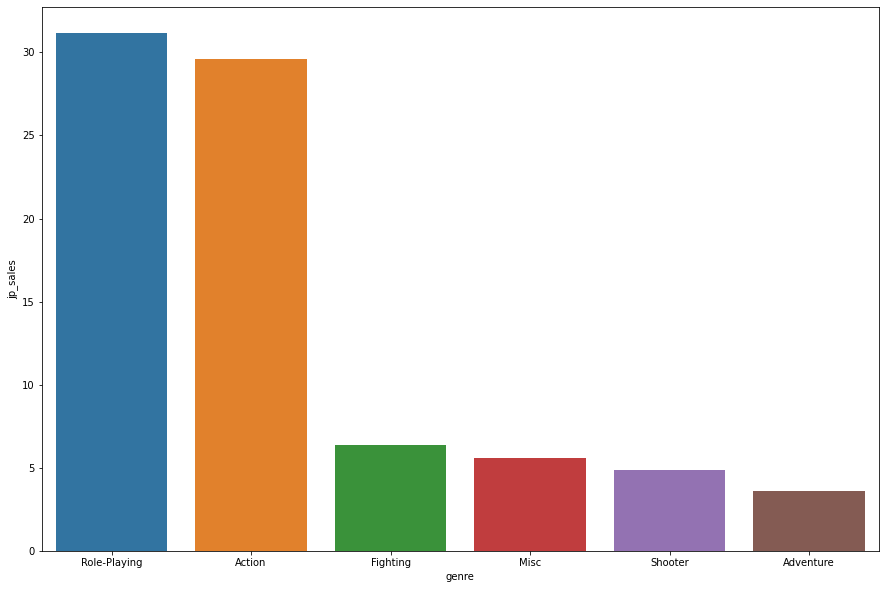

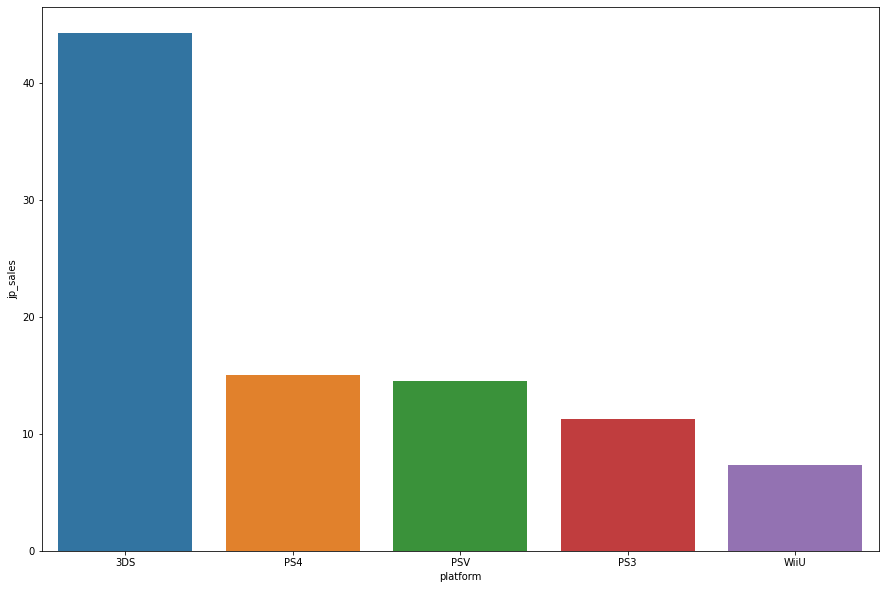

In [25]:
jp_stat_genre = data[data['year_of_release']>2013].pivot_table(
            index='genre',\
            values='jp_sales',\
            aggfunc='sum'\
).round(2).reset_index()

jp_stat_genre = jp_stat_genre.sort_values(by='jp_sales', ascending=False).head(6)

jp_stat_platform = data[data['year_of_release']>2013].pivot_table(
            index='platform',\
            values='jp_sales',\
            aggfunc='sum'\
).round(2).reset_index()

jp_stat_platform = jp_stat_platform.sort_values(by='jp_sales', ascending=False).head(5)

plt.figure(figsize=(15,10))
sns.barplot(data=jp_stat_genre, x="genre", y="jp_sales")
plt.show()

plt.figure(figsize=(15,10))
sns.barplot(data=jp_stat_platform, x="platform", y="jp_sales")
plt.show()

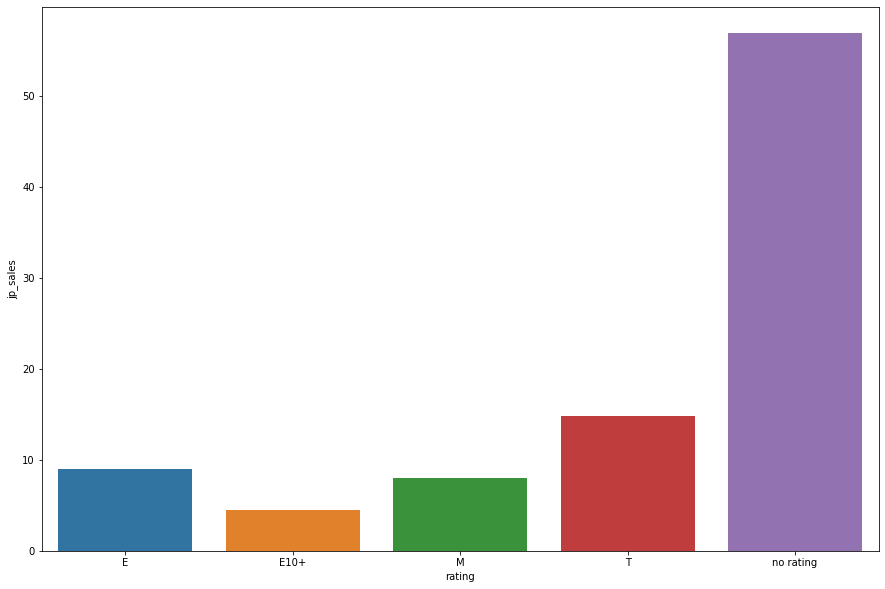

In [26]:
jp_stat_rate = data[data['year_of_release']>2013].pivot_table(
            index='rating',\
            values='jp_sales',\
            aggfunc='sum'\
).round(2).reset_index()

plt.figure(figsize=(15,10))
sns.barplot(data=jp_stat_rate, x="rating", y="jp_sales")
plt.show()

-Топ 5 популярных жанров в регионе JP: Role-Playing, Action, Shooter, Fighting, Simulation.
-Топ 5 популярных платформ в регионе JP: 3DS, PS4, PSV, PS3, WiiU.	 
-Самый большой спрос в регионе JP на игры без рейтинга ESRB. 


## Проверка гипотез

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 Альтернаятивная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [27]:
data.dropna(subset=['user_score'], inplace=True) # удалим пропуски в столбце user_score
xbox_one_user_rate = data[data['year_of_release']>2013].query('platform == "XOne"')['user_score']
pc_user_rate = data[data['year_of_release']>2013].query('platform == "PC"')['user_score']

alpha = .05 # выбираем критический уровень статистической значимости 

results = st.ttest_ind(xbox_one_user_rate, pc_user_rate, equal_var = False)

print('p-значение: ', results.pvalue)


if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")
    


p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Проверка гипотезы:  Средние пользовательские рейтинги жанров Action  и Sports разные.
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action  и Sports разные. Альтернаятивная гипотеза: Средние пользовательские рейтинги жанров Action  и Sports одинаковые.

In [28]:

action_user_rate = data[data['year_of_release']>2013].query('genre == "Action"')['user_score']
sports_user_rate = data[data['year_of_release']>2013].query('genre == "Sports"')['user_score']

alpha = .05 # выбираем критический уровень статистической значимости 

results = st.ttest_ind(action_user_rate, sports_user_rate, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action  и Sports разные. 

## Общий вывод

-Большинство платформ появляются и исчезают в период от 5 до 10 лет кроме DS и PC.


-PC - игры приносили гораздо меньше, но зато диапозон существования PC покрывает весь анализируемый период, нельзя сказать, что он менее прибыльный, ведь неизвестны затраты на производство, т.е. конверсия, так же можно учитывать, что PC гораздо более популярная техника, чем игровые приставки и портативные системы и продать игровой диск на PC легче, чем приставку с диском и т.д..

-DS, GBA, PSP - портативные игровые системы, по прибыли находятся между PC и игровыми приставками.


-Наиболее прибыльные игровые приставки. Можно отметить успешную компанию PS: 4 серии приставок с пиком PS2 и снижение к выходу PS4. Не сильно отстали платформы Wii, XBOX и  DS.

-В целом корреляцинную связь продаж можно оценить как слабую между оценками критиков, и как очень слабую между оценкой пользователей.

-Топ 5 популярных жанров в регионе NA: Shooter, Action, Sports, Role-Playing, Misc.

-Топ 5 популярных платформ в регионе NA: PS4, xOne, x360, PS3, WiiU. 

-Самый большой спрос в регионе NA на игры с рейтингом ESRB- M. 

-Топ 5 популярных жанров в регионе EU: Action, Shooter, Sports, Role-playing, Racing .

-Топ 5 популярных платформ в регионе EU: PS4, xOne, PS3, PC, 3DS.

-Самый большой спрос в регионе EU на игры с рейтингом ESRB- M.

-Топ 5 популярных жанров в регионе JP: Role-Playing, Action, Shooter, Fighting, Simulation.

-Топ 5 популярных платформ в регионе JP: 3DS, PS4, PSV, PS3, WiiU.	

-Самый большой спрос в регионе JP на игры без рейтинга ESRB. 

-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

-Средние пользовательские рейтинги жанров Action  и Sports разные. 

Рекомендации для нашего магазина: 
-Делать акцент на закупку видеоигр на игровые приставки.

-Для региона NA: в жанре Shooter, Action, Sports, Role-Playing, Misc.; На платформе PS4, xOne, x360, PS3, WiiU.; с рейтингом ESRB- M.

-Для региона EU: Action, Shooter, Sports, Role-playing, Racing; На платформе Wii, WiiU, PS4, PS3, xOne; с рейтингом ESRB- M.

-Для региона JP: Fighting, Puzzle, Role-Playing, Action, Adventure; На платформе 3DS, PSV, PS3, PS4, WiiU; с рейтингом ESRB- T.